In [16]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df = pd.read_csv(url)

In [18]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [19]:
# Feature engineering and selection
df['type'] = df['Type'].astype('category').cat.codes
features = ['type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = df[features]
y = df['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [21]:
# Function to optimize production scheduling
def optimize_schedule(model, X, df):
    df['predicted_failure'] = model.predict_proba(X)[:, 1]  # Probability of machine failure
    df['priority'] = df['predicted_failure'] / df['Process temperature [K]']  # Simplified priority calculation
    optimized_schedule = df.sort_values(by='priority', ascending=False)
    return optimized_schedule

# Apply the optimization
optimized_schedule = optimize_schedule(model, X, df)

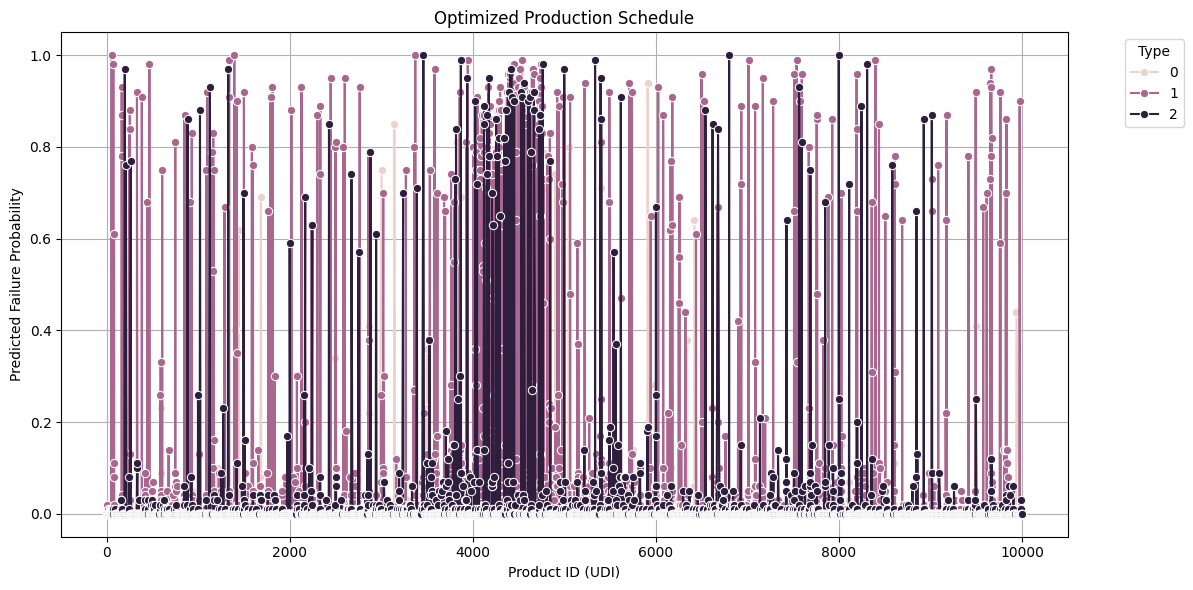

In [22]:
# Visualize the optimized schedule
# This figure shows the predicted failure probability over the Product ID (UDI) for different product types.
plt.figure(figsize=(12, 6))
sns.lineplot(data=optimized_schedule, x='UDI', y='predicted_failure', hue='type', marker='o')
plt.title('Optimized Production Schedule')
plt.xlabel('Product ID (UDI)')
plt.ylabel('Predicted Failure Probability')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

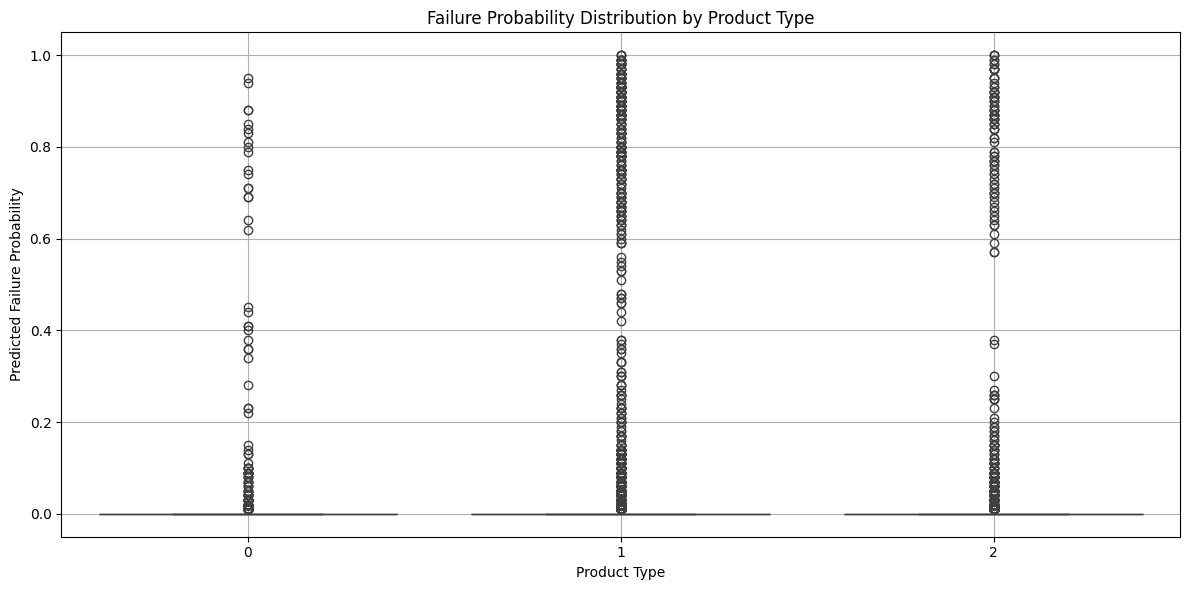

In [23]:
# Additional Insights: Failure Probability Distribution by Product Type
# This figure shows the distribution of predicted failure probabilities for different product types.
plt.figure(figsize=(12, 6))
sns.boxplot(data=optimized_schedule, x='type', y='predicted_failure')
plt.title('Failure Probability Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Predicted Failure Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

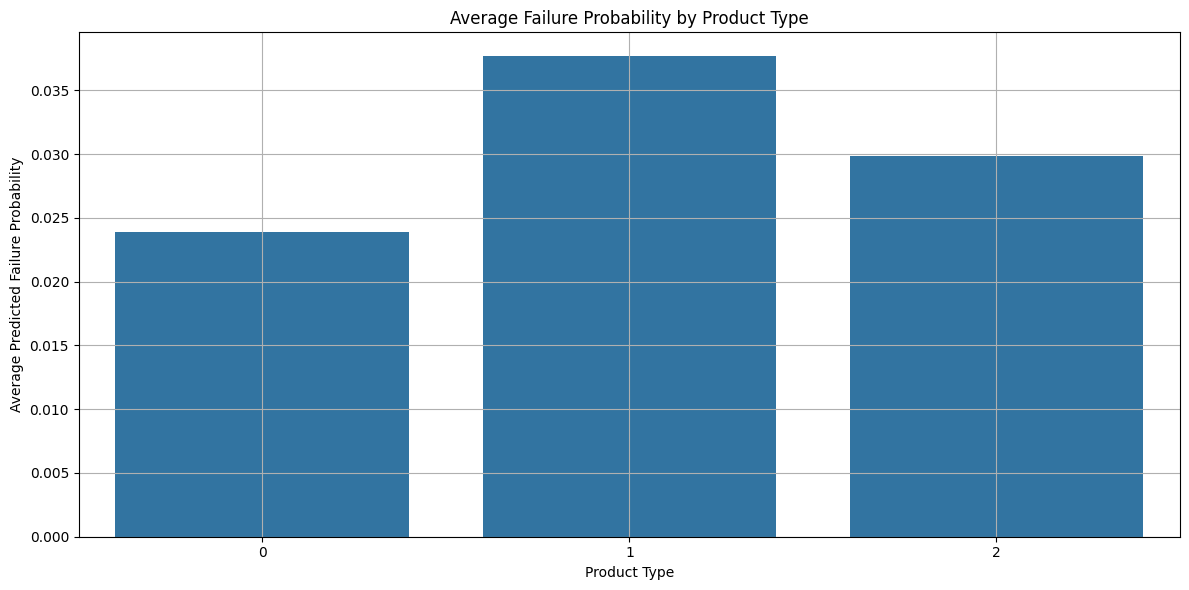

In [24]:
# Average Failure Probability by Product Type
# This figure shows the average predicted failure probability for each product type.
avg_failure_prob = optimized_schedule.groupby('type')['predicted_failure'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_failure_prob, x='type', y='predicted_failure')
plt.title('Average Failure Probability by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Predicted Failure Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

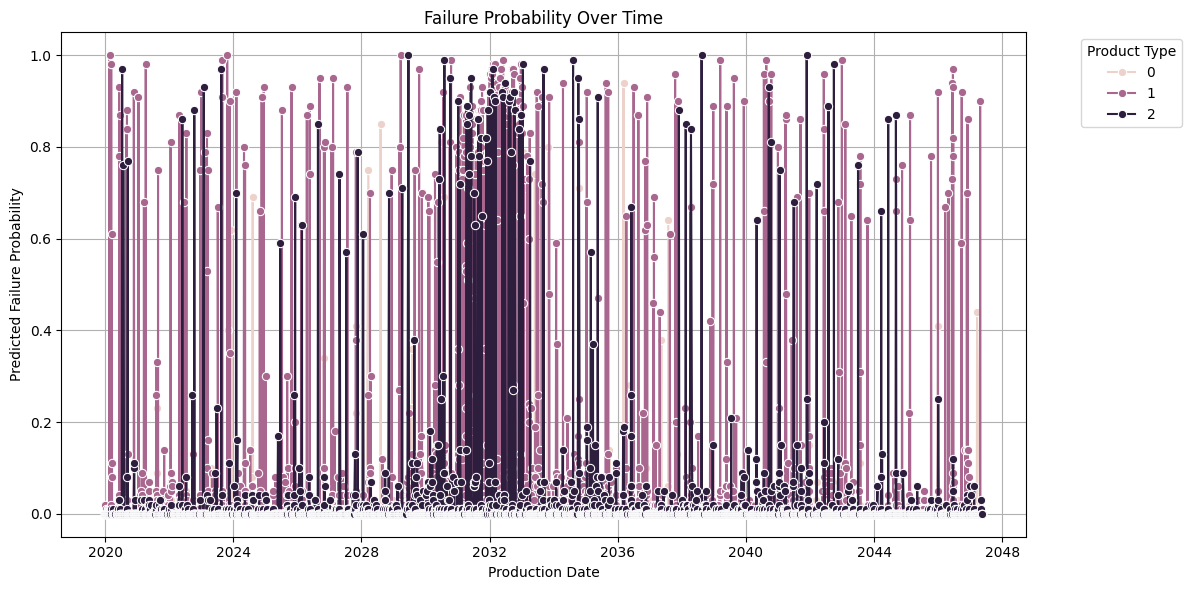

In [25]:
# Failure Probability Over Time
# This figure shows the predicted failure probability over time for different product types.
optimized_schedule['production_date'] = pd.to_datetime(optimized_schedule['UDI'], unit='D', origin='2020-01-01')
plt.figure(figsize=(12, 6))
sns.lineplot(data=optimized_schedule, x='production_date', y='predicted_failure', hue='type', marker='o')
plt.title('Failure Probability Over Time')
plt.xlabel('Production Date')
plt.ylabel('Predicted Failure Probability')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()